In [1]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target*=100

In [2]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

regressor = DecisionTreeRegressor()
cv_results_tree_regressor = cross_validate(regressor, data, target, cv=cv, scoring='neg_mean_absolute_error', n_jobs=2)

errors_tree_regressor = pd.Series(-cv_results_tree_regressor['test_score'], name='Decision Tree regressor')

errors_tree_regressor.describe()

count    30.000000
mean     45.772685
std       1.305317
min      43.406871
25%      44.910546
50%      45.795549
75%      46.874990
max      48.328945
Name: Decision Tree regressor, dtype: float64

In [5]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy='mean')
cv_results_dummy = cross_validate(dummy, data, target, cv=cv, scoring='neg_mean_absolute_error', n_jobs=2)

errors_dummy_regressor = pd.Series(-cv_results_dummy['test_score'], name='Dummy regressor')

errors_dummy_regressor.describe()

count    30.000000
mean     91.140009
std       0.821140
min      89.757566
25%      90.543652
50%      91.034555
75%      91.979007
max      92.477244
Name: Dummy regressor, dtype: float64

In [6]:
all_errors = pd.concat([errors_tree_regressor, errors_dummy_regressor], axis=1)
all_errors

,Decision Tree regressor,Dummy regressor
0,47.188051,90.713153
1,46.996025,90.539353
2,44.265886,91.941912
3,43.623245,90.213912
4,48.328945,92.015862
5,44.844297,90.542490
6,43.942335,89.757566
7,44.581243,92.477244
8,45.109295,90.947952
9,45.168789,91.991373


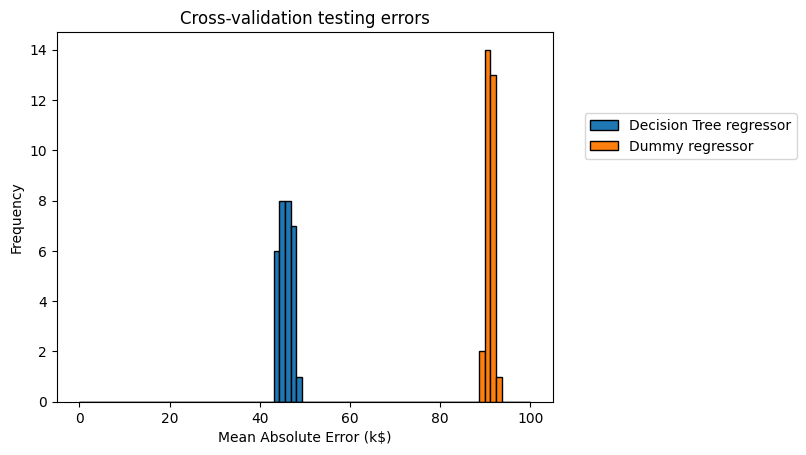

In [7]:
import matplotlib.pyplot as plt
import numpy as np

bins = np.linspace(start=0, stop=100, num=80)
all_errors.plot.hist(bins=bins, edgecolor='black')
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left')
plt.xlabel('Mean Absolute Error (k$)')
_ = plt.title("Cross-validation testing errors")